# Loan Eligibility Prediction System

#### The goal of this project is to develop a model to predict the eligibility of a customer to secure a loan based on set parameters.

# Outline
- ***Loading the Libraries***
- ***Data Loading***
- ***Data Overview***
- ***Data Cleaning***
 - ***Replace missing values***
 - ***Drop unwanted columns***
- ***Data Visualization***
- ***Categorical Data encoding***
- ***Model Development***
 - ***Dividing the data***
 - ***Standadize the split data***
 - ***Loss Function***
- ***Machine Learning Models***
 - ***Gaussian NB***
 - ***SVC with Grid Search CV***
 - ***Xgboost Classifier***
 - ***Decision Tree with Randomized Search***
 - ***Random Forest***
 - ***KNeighborsClassifier***
- ***Select and Save the model***

### Load the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
sns.set_style('whitegrid')
%matplotlib inline

### Load the data

In [2]:
train_data = pd.read_csv('Loan Prediction_Train Data.csv')

### Reviewing the dataset

In [3]:
train_data.shape

(614, 13)

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_data.describe() #for numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


### Data Cleaning

In [13]:
# first is the def operator, name of custom function,argument in bracket,full column. 
# second is the arithmetic we want it to undergo which produces a result
#print result

def missing_values(df):
    a = num_null_values = df.isnull().sum()
    return a

In [14]:
missing_values(train_data)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
### Dealing with null values(categorical)
#for is the operator
# cat represents all the elements in the list

Cat_list = train_data[["Gender","Married","Self_Employed"]] #A subset of a dataframe must be called with 2 square brackets
for cat in Cat_list:
    train_data[cat].fillna(train_data[cat].mode().iloc[0],inplace=True)

In [16]:
train_data.drop(["Loan_ID","Dependents"],axis = 1,inplace = True) #axis = 0 for row and axis =1 for column

In [17]:
missing_values(train_data)

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
train_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
### Dealing with null values(continous/numerical)
Num_list = train_data[["LoanAmount","Loan_Amount_Term","Credit_History"]]
for num in Num_list:
    train_data[num].fillna(train_data[num].mean(axis=0),inplace=True) #Axis = 0 refers to rows.

In [20]:
missing_values(train_data)

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Visualization

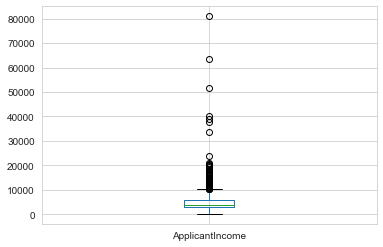

In [72]:
train_data.boxplot(column='ApplicantIncome')

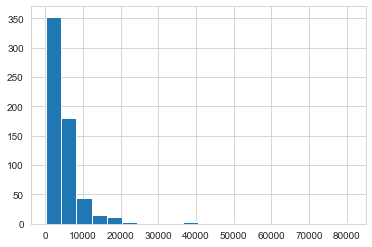

In [73]:
train_data['ApplicantIncome'].hist(bins=20)

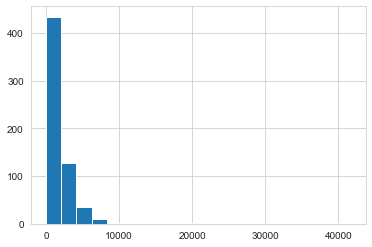

In [74]:
train_data['CoapplicantIncome'].hist(bins=20)

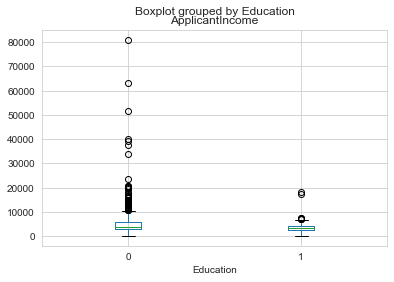

In [75]:
train_data.boxplot(column='ApplicantIncome', by='Education')

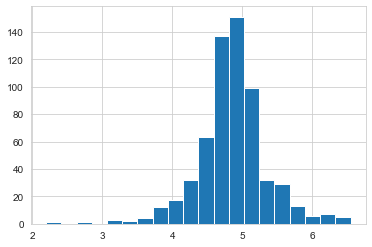

In [21]:
train_data['LoanAmount_log']=np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)

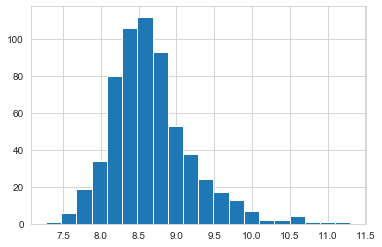

In [22]:
train_data['TotalIncome']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
train_data['TotalIncome_log']=np.log(train_data['TotalIncome'])
train_data['TotalIncome_log'].hist(bins=20)

In [23]:
# first is the def operator, name of custom function,argument in bracket,full column. 
# second is the arithmetic we want it to undergo which produces a result
#print result

def bar_chart(col):
    y=train_data["Loan_Status"]
    Approved = train_data[y=="Y"][col].value_counts()
    Disapproved= train_data[y=="N"][col].value_counts()
    
    dfl = pd.DataFrame([Approved,Disapproved])
    dfl.index=["Approved","Disapproved"]
    dfl.plot(kind="bar")

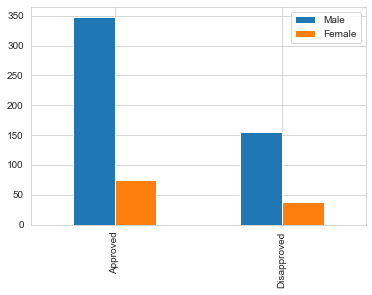

In [24]:
bar_chart("Gender")

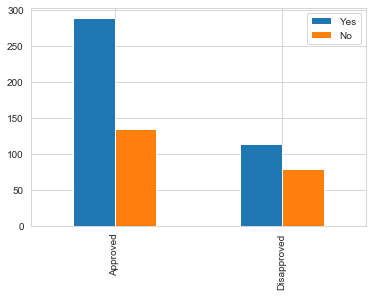

In [25]:
bar_chart("Married")

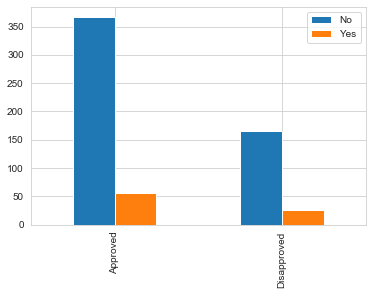

In [26]:
bar_chart("Self_Employed")

Number of people who take loan by gender:
Male      502
Female    112
Name: Gender, dtype: int64


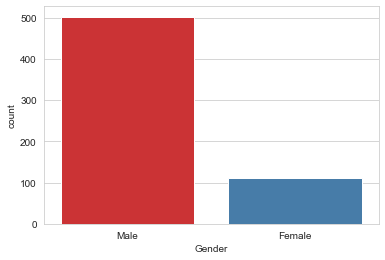

In [27]:
print("Number of people who take loan by gender:")
print(train_data['Gender'].value_counts())
sns.countplot(x='Gender',data=train_data, palette ='Set1')

Number of people who take loan by Marital Status:
Yes    401
No     213
Name: Married, dtype: int64


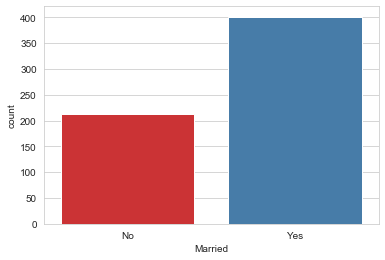

In [28]:
print("Number of people who take loan by Marital Status:")
print(train_data['Married'].value_counts())
sns.countplot(x='Married',data=train_data, palette ='Set1')

### Data Encoding

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
ord_enc=OrdinalEncoder()

In [31]:
train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]=ord_enc.fit_transform(train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]])

In [32]:
train_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0,4.986426,5849.0,8.674026
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0,4.852030,6091.0,8.714568
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0,4.189655,3000.0,8.006368
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0,4.787492,4941.0,8.505323
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0,4.262680,2900.0,7.972466
610,1.0,1.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0,3.688879,4106.0,8.320205
611,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0,5.533389,8312.0,9.025456
612,1.0,1.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0,5.231109,7583.0,8.933664


In [33]:
train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]=train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]].astype("int")

In [34]:
train_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


### Model Development

#### Spliting the data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x=train_data.drop('Loan_Status',axis=1)
y=train_data['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [37]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,4.986426,5849.0,8.674026
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,4.852030,6091.0,8.714568
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,4.189655,3000.0,8.006368
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,4.787492,4941.0,8.505323
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,4.262680,2900.0,7.972466
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,3.688879,4106.0,8.320205
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,5.533389,8312.0,9.025456
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,5.231109,7583.0,8.933664


In [41]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [42]:
x_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
222,1,0,0,0,2971,2791.0,144.0,360.0,1.0,1,4.969813,5762.0,8.659040
281,1,1,0,0,3927,800.0,112.0,360.0,1.0,1,4.718499,4727.0,8.461046
372,1,1,0,1,9323,7873.0,380.0,300.0,1.0,0,5.940171,17196.0,9.752432
32,1,0,0,1,4692,0.0,106.0,360.0,1.0,0,4.663439,4692.0,8.453614
204,1,1,1,0,3917,0.0,124.0,360.0,1.0,1,4.820282,3917.0,8.273081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,0,1,1,18165,0.0,125.0,360.0,1.0,2,4.828314,18165.0,9.807252
584,1,1,0,0,2787,1917.0,146.0,360.0,0.0,0,4.983607,4704.0,8.456168
493,0,0,1,1,17263,0.0,225.0,360.0,1.0,1,5.416100,17263.0,9.756321
527,1,1,1,0,5285,1430.0,161.0,360.0,0.0,1,5.081404,6715.0,8.812099


In [43]:
x_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
414,0,1,1,0,2149,3237.0,178.0,360.0,0.0,1,5.181784,5386.0,8.591558
569,1,1,0,0,3166,2064.0,104.0,360.0,0.0,2,4.644391,5230.0,8.562167
265,1,0,0,0,4095,3447.0,151.0,360.0,1.0,0,5.017280,7542.0,8.928243
84,1,1,0,0,3988,0.0,50.0,240.0,1.0,2,3.912023,3988.0,8.291045
109,1,1,1,0,2071,754.0,94.0,480.0,1.0,1,4.543295,2825.0,7.946264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1,0,0,0,9166,0.0,244.0,360.0,1.0,2,5.497168,9166.0,9.123256
589,1,1,0,1,2726,0.0,106.0,360.0,0.0,1,4.663439,2726.0,7.910591
123,1,1,0,0,2957,0.0,81.0,360.0,1.0,1,4.394449,2957.0,7.991931
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,4.787492,4941.0,8.505323


In [44]:
y_train

222    1
281    1
372    1
32     0
204    1
      ..
534    1
584    0
493    1
527    1
168    0
Name: Loan_Status, Length: 491, dtype: int32

In [45]:
y_test

414    0
569    0
265    1
84     1
109    1
      ..
152    0
589    0
123    1
3      1
557    1
Name: Loan_Status, Length: 123, dtype: int32

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 13)
(123, 13)
(491,)
(123,)


#### Normalizing the features of the dataset

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss=StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

#### Developing the Loss Function

In [76]:
from sklearn.metrics import precision_score, recall_score,accuracy_score

# first is the def operator, name of custom function,argument in bracket,full column. 
# second is the arithmetic we want it to undergo which produces a result
#print result

def loss(y_test,y_pred):
    pre = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    
    
    print(pre)
    print(rec)
    print(acc)

#### Using Gaussian NB

In [50]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred1=gnb.predict(x_test)

In [51]:
pred1

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [53]:
loss(y_test,pred1)

0.7766990291262136
0.9523809523809523
0.7804878048780488


#### Using SVC with Grid Search CV

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
#defining the parameter range
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.788, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.768, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.724, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.704, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.768, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.765, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.735, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [55]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [56]:
svc = SVC(C= 0.1, gamma=1, kernel= 'rbf')
svc.fit(x_train,y_train)
pred2=svc.predict(x_test)

In [57]:
loss(y_test,pred2)

0.6829268292682927
1.0
0.6829268292682927


#### Using XGBoost Classifier

In [58]:
import xgboost as xgb

In [59]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.1,
n_estimator=1000,
max_depth=3,
min_child_weight = 1,
gamma= 0,
subsample = 0.8,
colsample_bytree =0.8,
objective='binary:logistic',
nthread = 4,
scale_pos_weight =1,
seed=27)
xgb.fit(x_train,y_train)
pred3=xgb.predict(x_test)
loss(y_test,pred3)

[06:16:56] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:16:56] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7596153846153846
0.9404761904761905
0.7560975609756098


C:\Users\blessing.opaluwa\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [60]:
loss(y_test,pred3)

0.7596153846153846
0.9404761904761905
0.7560975609756098


#### Using Decision Tree with Randomized Search

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20,clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf,params, n_iter=runs, cv=5, n_jobs=-1, random_state =2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_
    
    #Extract best score
    best_score = rand_clf.best_score_
    
    #print best score
    print('Training score: {:.3f}'.format(best_score))
    
    #predict test set labels
    y_pred = best_model.predict(x_test)
    
    #compute accuracy
    accuracy=accuracy_score(y_test,y_pred)
    
    #print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model


In [63]:
randomized_search(params={'criterion':['entropy','gini'],
                         'splitter':['random','best'],
                         'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01],
                         'min_samples_split': [2,3,4,5,6,8,10],
                         'min_samples_leaf':[1,0.01,0.02,0.03,0.04],
                         'min_impurity_decrease':[0.0,0.0005,0.005,0.05,0.10,0.15,0.2],
                         'max_leaf_nodes':[10,15,20,25,30,35,40,45,50,None],
                         'max_features':['auto',0.95,0.90,0.85,0.80,0.75,0.70],
                         'max_depth':[None,2,4,6,8],
                         'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01,0.05]
                         })

Training score: 0.819
Test score: 0.772


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=0.02, min_samples_split=10,
                       min_weight_fraction_leaf=0.005, presort='deprecated',
                       random_state=2, splitter='random')

In [64]:
ds=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=0.02, min_samples_split=10,
                       min_weight_fraction_leaf=0.005, presort='deprecated',
                       random_state=2, splitter='random')
ds.fit(x_train,y_train)
pred4=ds.predict(x_test)
loss(y_test,pred4)

0.7592592592592593
0.9761904761904762
0.7723577235772358


#### Using Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
pred5=rf.predict(x_test)

In [67]:
loss(y_test,pred5)

0.7572815533980582
0.9285714285714286
0.7479674796747967


#### Using KNeighborsClassifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

KN=KNeighborsClassifier()
KN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
pred6=KN.predict(x_test)
loss(y_test,pred6)

0.7592592592592593
0.9761904761904762
0.7723577235772358


#### Selecting and Saving the model

In [70]:
import joblib

In [71]:
#Selecting the model with the highest accuracy score
joblib.dump(gnb,'model.gnb')

['model.gnb']